In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
#import os
#os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras import  backend as K
#K.set_image_dim_ordering('tf')
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/chunyu/Downloads/kaggle/digit_recognizer/keras/input"]).decode("utf8"))

Using TensorFlow backend.


test.csv
train.csv



In [27]:
train = pd.read_csv("/Users/chunyu/Downloads/kaggle/digit_recognizer/keras/input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test= pd.read_csv("/Users/chunyu/Downloads/kaggle/digit_recognizer/keras/input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

print X_train.shape

(42000, 784)


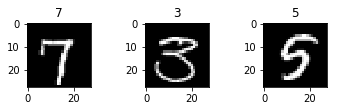

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
print X_train.shape

X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print X_test.shape

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

(42000, 28, 28, 1)
(28000, 28, 28, 1)


10

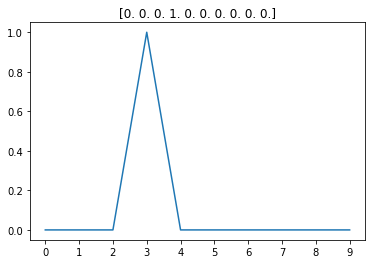

In [32]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [33]:
seed = 43
np.random.seed(seed)

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

('input shape ', (None, 28, 28, 1))
('output shape ', (None, 10))


In [34]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

from keras.preprocessing import image
gen = image.ImageDataGenerator()


In [35]:
from sklearn.model_selection import train_test_split
X = X_train
print X[0].ndim
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
print type(X_train)
print X_train[0].ndim
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

3
<type 'numpy.ndarray'>
3
Epoch 1/3
37800/37800 [==============================] - 140s 4ms/step - loss: 0.2401 - acc: 0.9342 - val_loss: 0.3298 - val_acc: 0.9112
Epoch 2/3
37800/37800 [==============================] - 145s 4ms/step - loss: 0.2157 - acc: 0.9418 - val_loss: 0.3695 - val_acc: 0.9055
Epoch 3/3
37800/37800 [==============================] - 154s 4ms/step - loss: 0.2099 - acc: 0.9437 - val_loss: 0.3806 - val_acc: 0.9027


In [37]:
history_dict = history.history
history_dict

{'acc': [0.9341877117764468, 0.9417718922108339, 0.9437064041982356],
 'loss': [0.24004536902730741, 0.21571505384558207, 0.20986270503305082],
 'val_acc': [0.9111819460870748, 0.9054914549082755, 0.9026630451066896],
 'val_loss': [0.32984673902528416, 0.36950493357822073, 0.38064430218043555]}

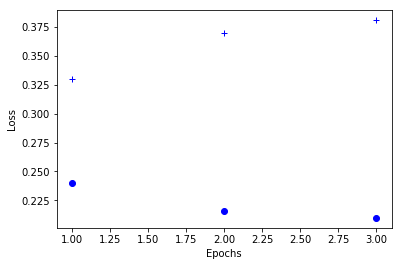

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

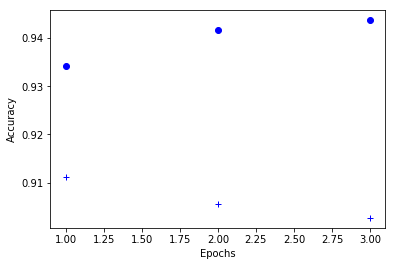

In [39]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [40]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

fc = get_fc_model()
fc.optimizer.lr=0.01

In [41]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
37800/37800 [==============================] - 527s 14ms/step - loss: 0.1624 - acc: 0.9726 - val_loss: 0.4858 - val_acc: 0.9546
Epoch 2/3
37800/37800 [==============================] - 503s 13ms/step - loss: 0.1703 - acc: 0.9833 - val_loss: 0.5482 - val_acc: 0.9600
Epoch 3/3
37800/37800 [==============================] - 507s 13ms/step - loss: 0.2183 - acc: 0.9833 - val_loss: 0.5431 - val_acc: 0.9646


In [42]:
history_dict = history.history
history_dict

{'acc': [0.9725619441021371, 0.9833020634859665, 0.9832532560442563],
 'loss': [0.16232158580238304, 0.17033309318809542, 0.21828182279859365],
 'val_acc': [0.9545621203222341, 0.9599869803804171, 0.9645663105500626],
 'val_loss': [0.48580698649608317, 0.548174116318537, 0.5430882388122023]}

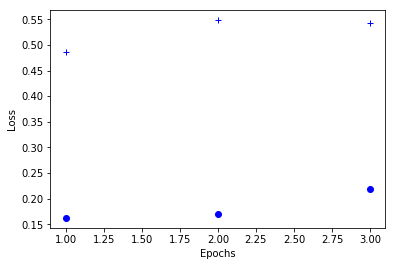

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

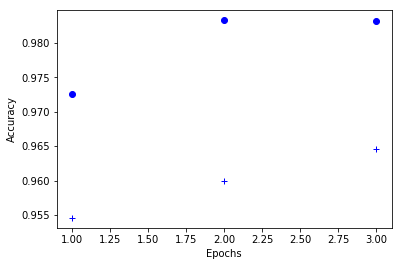

In [44]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [45]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [46]:
model= get_cnn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)
# the result is not as good as the sample net, why?

Epoch 1/1
37800/37800 [==============================] - 6588s 174ms/step - loss: 2.3025 - acc: 0.1091 - val_loss: 2.3008 - val_acc: 0.1122


In [47]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [48]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 6663s 176ms/step - loss: 2.3024 - acc: 0.1092 - val_loss: 2.3022 - val_acc: 0.1122


In [49]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [50]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 29008s 767ms/step - loss: 0.0372 - acc: 0.9895 - val_loss: 0.0491 - val_acc: 0.9905


In [52]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("/Users/chunyu/Downloads/kaggle/digit_recognizer/keras/input/DR.csv", index=False, header=True)